In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from random import randint
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import svm

In [2]:
pd.set_option('display.max_columns', None)
modelDF = pd.read_csv(r'modelDF.csv')
print(modelDF.dtypes)
modelDF

Unnamed: 0                                   int64
gender                                        bool
SeniorCitizen                                 bool
Partner                                       bool
Dependents                                    bool
tenure                                       int64
PhoneService                                  bool
PaperlessBilling                              bool
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                         bool
MultipleLines_No                              bool
MultipleLines_No phone service                bool
MultipleLines_Yes                             bool
InternetService_DSL                           bool
InternetService_Fiber optic                   bool
InternetService_No                            bool
OnlineSecurity_No                             bool
OnlineSecurity_No internet service            bool
OnlineSecurity_Yes             

,Unnamed: 0,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,False,False,True,False,1,False,True,29.85,29.85,False,False,True,False,True,False,False,True,False,False,False,False,True,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,False,True,False
1,1,True,False,False,False,34,True,False,56.95,1889.50,False,True,False,False,True,False,False,False,False,True,True,False,False,False,False,True,True,False,False,True,False,False,True,False,False,False,True,False,False,False,False,True
2,2,True,False,False,False,2,True,True,53.85,108.15,True,True,False,False,True,False,False,False,False,True,False,False,True,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,False,False,True
3,3,True,False,False,False,45,False,False,42.30,1840.75,False,False,True,False,True,False,False,False,False,True,True,False,False,False,False,True,False,False,True,True,False,False,True,False,False,False,True,False,True,False,False,False
4,4,False,False,False,False,2,True,True,70.70,151.65,True,True,False,False,False,True,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,7038,True,False,True,True,24,True,True,84.80,1990.50,False,False,False,True,True,False,False,False,False,True,True,False,False,False,False,True,False,False,True,False,False,True,False,False,True,False,True,False,False,False,False,True
7039,7039,False,False,True,True,72,True,True,103.20,7362.90,False,False,False,True,False,True,False,True,False,False,False,False,True,False,False,True,True,False,False,False,False,True,False,False,True,False,True,False,False,True,False,False
7040,7040,False,False,True,True,11,False,True,29.60,346.45,False,False,True,False,True,False,False,False,False,True,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,False,True,False
7041,7041,True,True,True,False,4,True,True,74.40,306.60,True,False,False,True,False,True,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,False,False,True


In [3]:
# Create predictor labels, and split data into train/test
# It's important to note that dimensionality reduction is important for a linear support vector machine
# Linear SVM complexity scales exponentially.  With this in mind, we've removed the same variables that we've
# removed from the Logistic Regression model in order to achieve a decent run time for model fit.
# Adding just one of these features back to the model increases fit time GREATLY, and the variables don't 
# seem to stray from the usefulness discovered in the LogReg model.
Y = modelDF['Churn'].values
X = modelDF.drop(labels = ['Churn',\
                           'Unnamed: 0',\
                           'OnlineBackup_No internet service','OnlineSecurity_No internet service',\
                           'DeviceProtection_No internet service','TechSupport_No internet service',\
                           'StreamingTV_No internet service','StreamingMovies_No internet service',\
                           'MonthlyCharges','TotalCharges','gender','Partner'],\
                 axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=101)

In [4]:
# Instantiate, fit and test a linear support vector classifier
# Then have it predict on the test set
clf = svm.SVC(kernel='linear', C = 1.0)
clf.fit(X, Y)
prediction_test = clf.predict(X_test)

In [5]:
# Print the accuracy of the SVC, and the correlation coefficients of the variables

print ("Accuracy: " + str(metrics.accuracy_score(y_test, prediction_test)))

weights = pd.Series(clf.coef_[0], index=X.columns.values)
weights.sort_values(ascending = False)

Accuracy: 0.7963094393186657


InternetService_Fiber optic                0.638936
TechSupport_No                             0.232258
OnlineSecurity_No                          0.223006
PaymentMethod_Electronic check             0.211679
PaperlessBilling                           0.204105
SeniorCitizen                              0.195914
MultipleLines_No phone service             0.172744
StreamingMovies_Yes                        0.171013
Contract_Month-to-month                    0.156187
StreamingTV_Yes                            0.150438
OnlineBackup_No                            0.130652
DeviceProtection_No                        0.090056
DeviceProtection_Yes                       0.058149
OnlineBackup_Yes                           0.017553
MultipleLines_Yes                          0.010493
Contract_Two year                          0.008074
StreamingTV_No                            -0.002233
StreamingMovies_No                        -0.022808
tenure                                    -0.031863
PaymentMetho

In [6]:
#Remove low correlation variables again.  Seeing the values from the previous run, tenure seems not useful enough to keep
Y = modelDF['Churn'].values
Z = modelDF.drop(labels = ['Churn',\
                           'Unnamed: 0',\
                           'OnlineBackup_No internet service','OnlineSecurity_No internet service',\
                           'DeviceProtection_No internet service','TechSupport_No internet service',\
                           'StreamingTV_No internet service','StreamingMovies_No internet service',\
                           'MonthlyCharges','TotalCharges','gender','Partner','tenure'],\
                 axis = 1)

Z_train, Z_test, y_train, y_test = train_test_split(Z, Y, test_size=0.2, random_state=101)

# Instantiate, fit and test another linear support vector classifier on the 
clf = svm.SVC(kernel='linear', C = 1.0)
clf.fit(Z, Y)
prediction_test = clf.predict(Z_test)

In [7]:
print ("Accuracy: " + str(metrics.accuracy_score(y_test, prediction_test)))

weights = pd.Series(clf.coef_[0], index=Z.columns.values)
weights.sort_values(ascending = False)

# Model accuracy fell by over 1% after removing tenure.  
# It seems that keeping it is useful, but it adversely effects the predicting power of other variables.
# That adverse effect isn't a bad thing. It indicates that, in the ecosystem of columns available, tenure is useful when
# used with the rest of the features.

Accuracy: 0.7856635911994322


Contract_Month-to-month                    0.666476
InternetService_Fiber optic                0.562322
PaymentMethod_Electronic check             0.330068
OnlineSecurity_No                          0.293530
OnlineBackup_No                            0.275319
PaperlessBilling                           0.248789
TechSupport_No                             0.240094
MultipleLines_No phone service             0.128683
DeviceProtection_No                        0.097388
PaymentMethod_Mailed check                 0.080724
SeniorCitizen                              0.071909
StreamingMovies_Yes                        0.061706
StreamingTV_Yes                            0.061374
StreamingTV_No                            -0.009936
StreamingMovies_No                        -0.010268
DeviceProtection_Yes                      -0.045949
InternetService_No                        -0.051439
MultipleLines_No                          -0.064318
MultipleLines_Yes                         -0.064364
PhoneService

C:\Users\Hazy3\anaconda3\envs\PyR\lib\site-packages\ipykernel_launcher.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Hazy3\anaconda3\envs\PyR\lib\site-packages\ipykernel_launcher.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  # This is added back by InteractiveShellApp.init_path()


Text(0, 0.5, 'Actual')

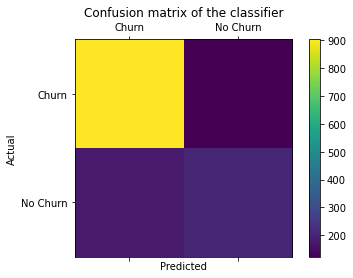

In [8]:
accuracy_score(y_true = y_test, y_pred = prediction_test)
confusion_matrix(y_true = y_test, y_pred = prediction_test)
cm = confusion_matrix(y_true = y_test, y_pred = prediction_test)
labels = ['Churn','No Churn']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')

<AxesSubplot:>

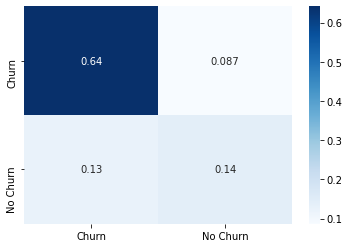

In [9]:
sns.heatmap(cm/np.sum(cm), annot=True, cmap='Blues',xticklabels=labels,yticklabels=labels)